In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read training dataset
titanic = pd.read_csv('C:\\Users\\shubh\\Desktop\\train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic['Survived'].value_counts()
#we see more people did not survive

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

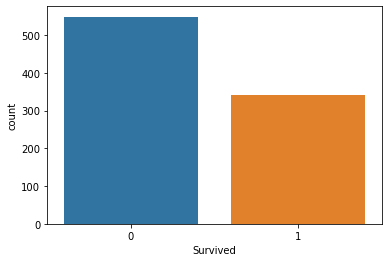

In [7]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(titanic['Survived'])


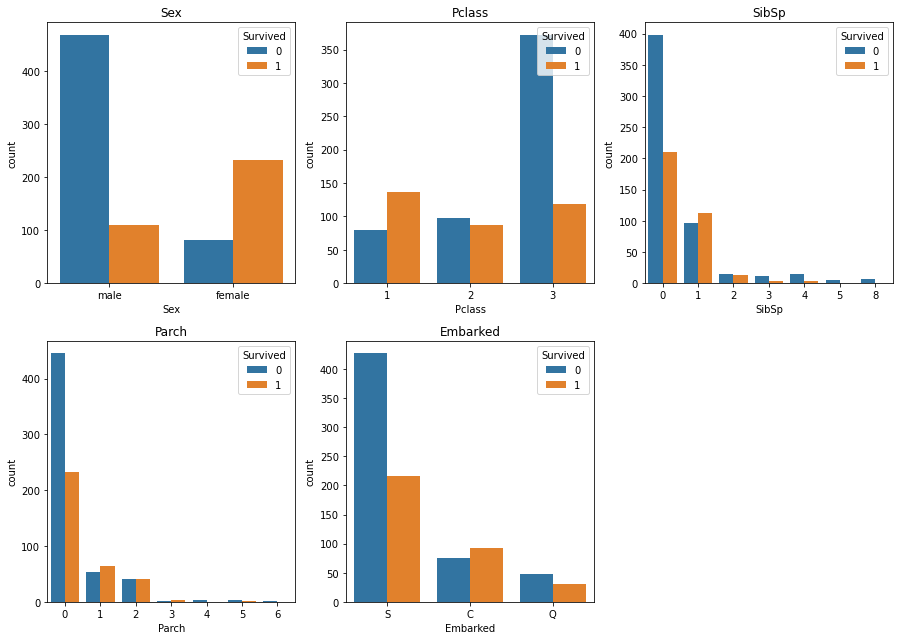

In [8]:
columns = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

rows = 2
cols = 3

f, axs = plt.subplots(rows, cols, figsize=(cols*4.2,rows*4.5))
#plotting each feature against survived column
for r in range(0,rows):
    for c in range(0,cols):  
        
        i = r*cols+ c        
        ax = axs[r][c]
        if(i>4):
            break
        sns.countplot(titanic[columns[i]], hue=titanic["Survived"], ax=ax) 
        ax.set_title(columns[i])
        ax.legend(title="Survived", loc='upper right') 
        
f.delaxes(axs[1,2])
plt.tight_layout()   

<AxesSubplot:>

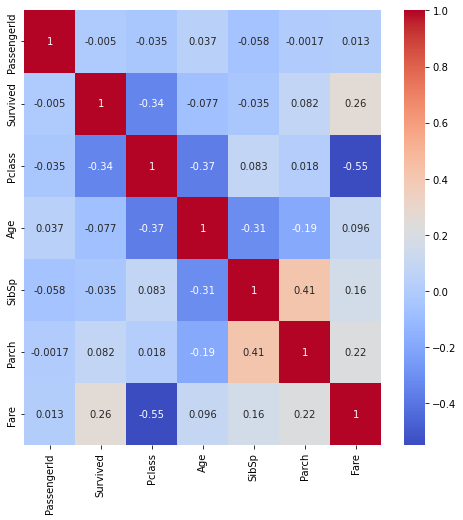

In [9]:
#Correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm')

In [10]:
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [11]:
titanic.groupby('Pclass')[['Survived']].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Age', ylabel='Count'>

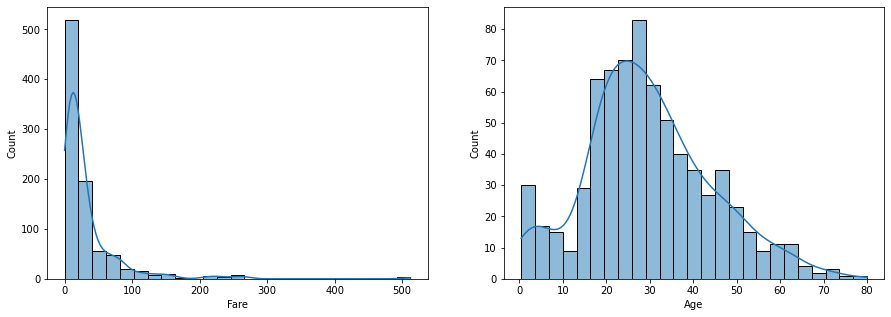

In [12]:
fig, axes = plt.subplots(1,2, figsize = (15,5))

sns.histplot(data = titanic, x = 'Fare', kde= True, bins = 25, ax = axes[0])
sns.histplot(data = titanic, x = 'Age', kde= True, bins = 25, ax = axes[1])

In [13]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
#drop unrelated features
unnecessary_features = ['PassengerId', 'Name', 'Ticket', 'Cabin']
titanic.drop(unnecessary_features, axis = 1, inplace=True)

In [16]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [17]:
titanic['Sex'] = titanic['Sex'].map( {'female': 0, 'male': 1} )

In [18]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,NaN,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [19]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [20]:
#drop rows where emarked value is empty
titanic = titanic.dropna(subset=['Embarked'])

In [21]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [22]:
#Since age and pclass are most correlated, use median age of pclass where age is not given for each pclass
for i in range(1, 4):
    titanic.loc[(titanic.Age.isnull()) & (titanic.Pclass == i), 'Age'] = titanic[(titanic['Pclass'] == i)]['Age'].median()

In [23]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
print(titanic['Embarked'].unique())

['S' 'C' 'Q']


In [25]:
titanic['Embarked'] = titanic['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

In [26]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [27]:
#training dataset
X_train = titanic.drop('Survived', axis = 1)
Y_train = titanic['Survived']

In [28]:
#testing dataset
test = pd.read_csv('C:\\Users\\shubh\\Desktop\\testdata_with_groundTruth.csv')

#perform same feature engineering on testing data
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
test['Sex'] = test['Sex'].map( {'female': 0, 'male': 1} )
test.drop(unnecessary_features, axis = 1, inplace=True)
for i in range(1, 4):
    test.loc[(test.Age.isnull()) & (test.Pclass == i), 'Age'] = test[(test['Pclass'] == i)]['Age'].median()
test = test.dropna(how='any',axis=0) 
X_test = test.drop('Survived', axis = 1)
Y_test = test['Survived']

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import math

# try to find the optimal hyper-parameter by cross-validation
solvers = ['newton-cg', 'lbfgs', 'liblinear']
#penalty method
penalty = ['none', 'l1', 'l2', 'elasticnet']
#penalty strength
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid_param = dict(solver=solvers,penalty=penalty,C=c_values)
lr = GridSearchCV(LogisticRegression(), grid_param, cv=5)
lr.fit(X_train, Y_train)

print('Best Score: %s' % lr.best_score_)
print('Best Hyperparameters: %s' % lr.best_params_)

Best Score: 0.8009268075922046
Best Hyperparameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In [30]:
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score
#use optimal parameters to train model 
lr = LogisticRegression(C = 1.0,penalty = 'l2', solver = 'newton-cg').fit(X_train, Y_train)

# Make predictions
Y_pred_LR = lr.predict(X_test)
#print('predictions:',Y_pred)
#print('groundTruth:', Y_test)
# Evaluate accuracy
print('Logistic Regression accuracy:', accuracy_score(Y_test, Y_pred_LR))
print('Confusion matrix:\n', confusion_matrix(Y_test,Y_pred_LR))
print('Classification Report:\n', classification_report(Y_test, Y_pred_LR))

Logistic Regression accuracy: 0.7601918465227818
Confusion matrix:
 [[211  48]
 [ 52 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       259
           1       0.69      0.67      0.68       158

    accuracy                           0.76       417
   macro avg       0.75      0.74      0.74       417
weighted avg       0.76      0.76      0.76       417



In [31]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, n_jobs=-1)
rf_random.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [32]:
print('Best Score: %s' % rf_random.best_score_)
print('Best Hyperparameters: %s' % rf_random.best_params_)

Best Score: 0.8054266387599721
Best Hyperparameters: {'n_estimators': 2000, 'max_features': 'log2', 'max_depth': 100}


In [33]:
from sklearn.metrics import confusion_matrix 
rf = RandomForestClassifier(n_estimators = 1600, max_features = 'sqrt', max_depth = 10).fit(X_train, Y_train)

# Make predictions
Y_pred_RF = rf.predict(X_test)
#print('predictions:',Y_pred_RF)
#print('groundTruth:', Y_test_RF)
# Evaluate accuracy
print('Random Forest classifier accuracy:',accuracy_score(Y_test, Y_pred_RF))
print('Confusion matrix:\n',confusion_matrix(Y_test,Y_pred_RF))
print('Classification Report:\n',classification_report(Y_test, Y_pred_RF))

Random Forest classifier accuracy: 0.7721822541966427
Confusion matrix:
 [[220  39]
 [ 56 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       259
           1       0.72      0.65      0.68       158

    accuracy                           0.77       417
   macro avg       0.76      0.75      0.75       417
weighted avg       0.77      0.77      0.77       417



In [34]:
my_survival = [[3, 1, 23, 0, 0, 5, 1]]
#Print Prediction of Random Forest Classifier model
pred = rf.predict(my_survival)
print(pred)

if pred == 0:
  print('Oh no! You didnt make it')
else:
  print('Nice! You survived')

[0]
Oh no! You didnt make it


In [35]:
altered_my_survival = [[1, 0, 23, 0, 0, 5, 1]]
#Print Prediction of Random Forest Classifier model
pred = rf.predict(altered_my_survival)
print(pred)

if pred == 0:
  print('Oh no! You didnt make it')
else:
  print('Nice! You survived')

[1]
Nice! You survived


In [36]:
importances = pd.DataFrame({'feature':titanic.iloc[:, 1:8].columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Sex,0.317
Fare,0.235
Age,0.213
Pclass,0.101
SibSp,0.056
Parch,0.043
Embarked,0.035


<AxesSubplot:xlabel='feature'>

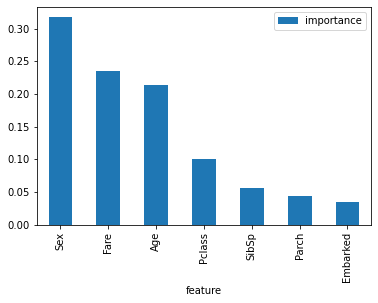

In [37]:
importances.plot.bar()